In [1]:
import numpy as np
import scipy.io
import pandas as pd
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
train_5=loadmat('./training_data_5.mat')
train_6=loadmat('./training_data_6.mat')

test_5=loadmat('./testing_data_5.mat')
test_6=loadmat('./testing_data_6.mat')

training_data_5 = train_5['train_data_5']
training_data_6 = train_6['train_data_6']

testing_data_5 = test_5['test_data_5']
testing_data_6 = test_6['test_data_6']

## Task 1

In [3]:
training_data_5_vectorized = training_data_5.reshape(-1, 784)
training_data_6_vectorized = training_data_6.reshape(-1, 784)
train_data=np.concatenate((training_data_5_vectorized, training_data_6_vectorized), axis=0)

testing_data_5_vectorized  = testing_data_5.reshape(-1, 784)
testing_data_6_vectorized  = testing_data_6.reshape(-1, 784)
test_data=np.concatenate((testing_data_5_vectorized,testing_data_6_vectorized),axis=0)


print((training_data_5_vectorized.shape,training_data_6_vectorized.shape,testing_data_5_vectorized.shape,testing_data_6_vectorized.shape))

print(train_data.shape)
print(test_data.shape)

((5421, 784), (5918, 784), (892, 784), (958, 784))
(11339, 784)
(1850, 784)


In [4]:
def image_normalization(images_vectorized):
    mean_values = np.mean(images_vectorized, axis=0)
    std_values = np.std(images_vectorized, axis=0)
    images_normalized = np.where(std_values != 0, (images_vectorized - mean_values) / std_values, 0)
    
    return images_normalized
    

In [5]:
train_data_normalized=image_normalization(train_data)
test_data_normalized=image_normalization(test_data)

/var/folders/x0/64gcr0ys1z50vtjfcb51kmq80000gn/T/ipykernel_39483/1523363628.py:4: RuntimeWarning: invalid value encountered in divide
  images_normalized = np.where(std_values != 0, (images_vectorized - mean_values) / std_values, 0)


In [6]:
train_data_normalized,test_data_normalized

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

## Task 2

In [7]:

cov_matrix = np.cov(train_data_normalized, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print("Training")
print(eigenvalues[:2])
num_components = 2
selected_components = eigenvectors[:, :num_components]


training_normalized_pca = np.dot(train_data_normalized,selected_components)
testing_normalized_pca = np.dot(test_data_normalized,selected_components)



Training
[51.41085966 42.16025548]


In [8]:
training_normalized_pca,testing_normalized_pca

(array([[ 7.28930416, -4.12641308],
        [ 4.52845743,  2.21921686],
        [ 7.91575916,  0.50940245],
        ...,
        [ 0.28151727,  4.55499053],
        [ 0.9678347 ,  7.12795008],
        [ 0.29674964,  4.99643503]]),
 array([[ 6.93573955e-01, -2.31473362e+00],
        [-2.91939808e+00, -1.00752598e+01],
        [ 8.04077696e+00, -3.30429069e-01],
        ...,
        [ 3.67081239e+00,  6.50133691e+00],
        [-6.06605699e-03,  9.52793760e+00],
        [-8.12796023e+00,  7.22464597e+00]]))

## Task 3

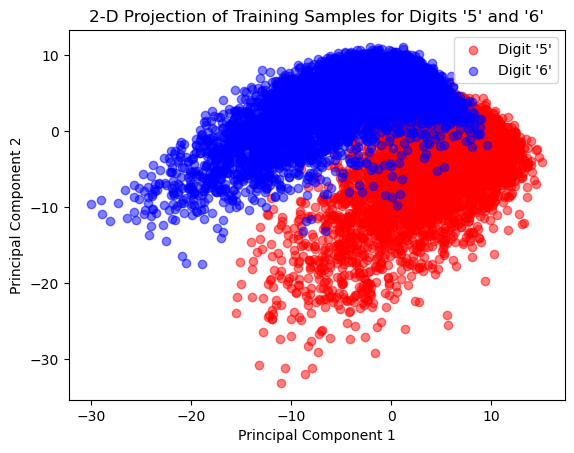

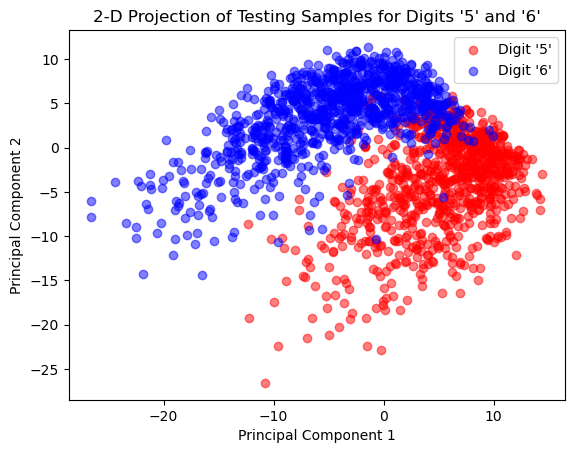

In [9]:
#scatter plot for training samples for image'5' and '6'
plt.scatter(training_normalized_pca[:5421, 0], training_normalized_pca[:5421, 1], label="Digit '5'", color="red",alpha=0.5)
plt.scatter(training_normalized_pca[5421:, 0], training_normalized_pca[5421:, 1], label="Digit '6'", color="blue",alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("2-D Projection of Training Samples for Digits '5' and '6'")

plt.show()


#scatter plot for training samples for image'5' and '6'
plt.scatter(testing_normalized_pca[:892, 0], testing_normalized_pca[:892, 1], label="Digit '5'", color="red",alpha=0.5)
plt.scatter(testing_normalized_pca[892:, 0], testing_normalized_pca[892:, 1], label="Digit '6'", color="blue",alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("2-D Projection of Testing Samples for Digits '5' and '6'")

plt.show()

In [10]:
train_labels = np.array([5] * 5421 + [6] * 5918)
test_labels = np.array([5] * 892 + [6] * 958)

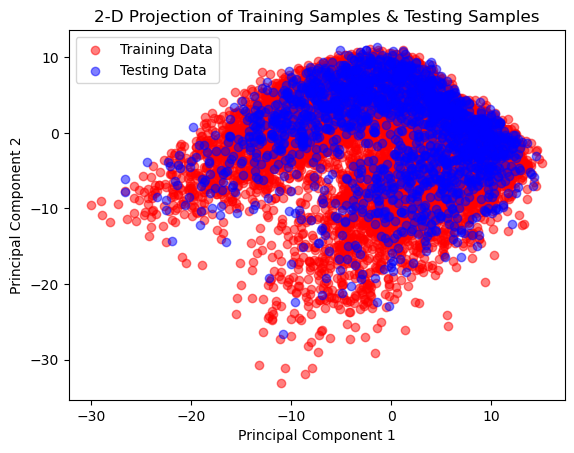

In [11]:
plt.scatter(training_normalized_pca[:, 0], training_normalized_pca[:, 1], label="Training Data", color="red",alpha=0.5)
plt.scatter(testing_normalized_pca[:, 0], testing_normalized_pca[:, 1], label="Testing Data", color="blue",alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("2-D Projection of Training Samples & Testing Samples")

plt.show()


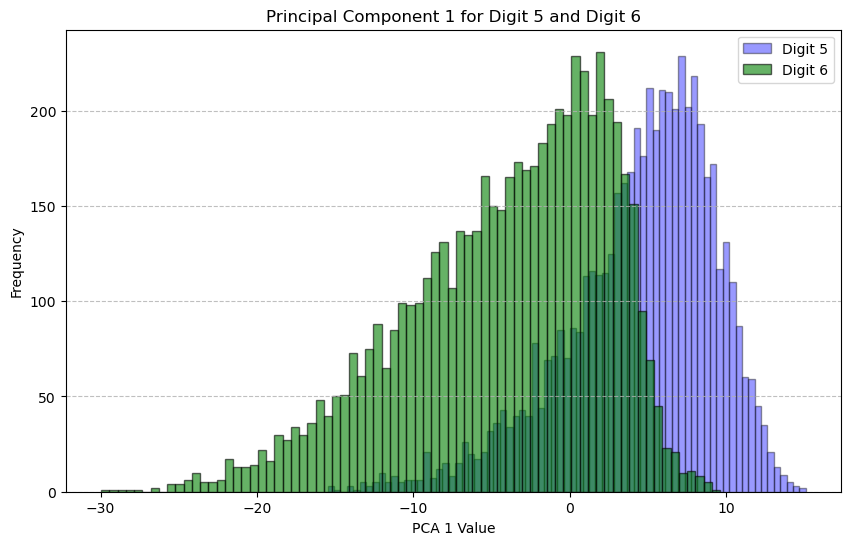

In [12]:
#Plotting distribution of PCA component 1 with frequency for Digit 5 & 6.
pca1_digit5 = training_normalized_pca[0:5421, 0]
pca1_digit6 = training_normalized_pca[5421:, 0]

hist_digit5, bins_digit5 = np.histogram(pca1_digit5, bins=75)  # Adjust the number of bins as needed
hist_digit6, bins_digit6 = np.histogram(pca1_digit6, bins=75)  # Adjust the number of bins as needed

plt.figure(figsize=(10, 6))
plt.hist(bins_digit5[:-1], bins_digit5, weights=hist_digit5, alpha=0.4, label="Digit 5", color='b', edgecolor='black')
plt.hist(bins_digit6[:-1], bins_digit6, weights=hist_digit6, alpha=0.6, label="Digit 6", color='g', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.xlabel("PCA 1 Value")
plt.ylabel("Frequency")
plt.title("Principal Component 1 for Digit 5 and Digit 6")
plt.legend()
plt.show()

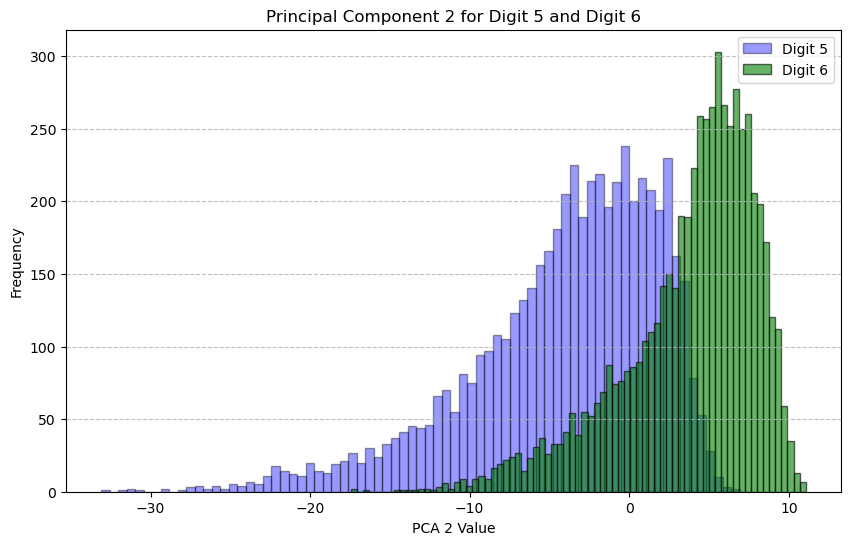

In [13]:
#Plotting distribution of PCA component 1 with frequency for Digit 5 & 6.
pca1_digit5 = training_normalized_pca[0:5421, 1]
pca1_digit6 = training_normalized_pca[5421:, 1]

hist_digit5, bins_digit5 = np.histogram(pca1_digit5, bins=75)  # Adjust the number of bins as needed
hist_digit6, bins_digit6 = np.histogram(pca1_digit6, bins=75)  # Adjust the number of bins as needed

plt.figure(figsize=(10, 6))
plt.hist(bins_digit5[:-1], bins_digit5, weights=hist_digit5, alpha=0.4, label="Digit 5", color='b', edgecolor='black')
plt.hist(bins_digit6[:-1], bins_digit6, weights=hist_digit6, alpha=0.6, label="Digit 6", color='g', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.xlabel("PCA 2 Value")
plt.ylabel("Frequency")
plt.title("Principal Component 2 for Digit 5 and Digit 6")
plt.legend()
plt.show()

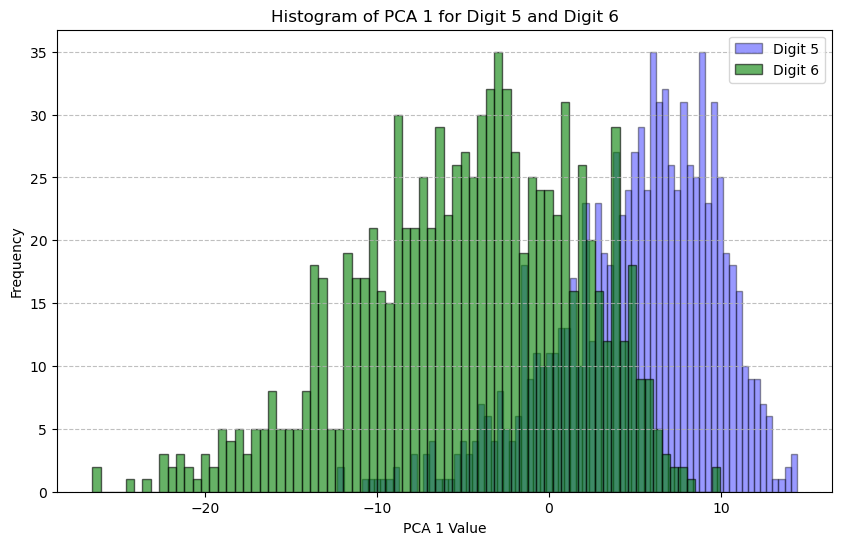

In [14]:
#Plotting distribution of PCA component 1 with frequency for Digit 5 & 6.  -- TESTING
pca1_digit5 = testing_normalized_pca[0:892, 0]
pca1_digit6 = testing_normalized_pca[892:, 0]


hist_digit5, bins_digit5 = np.histogram(pca1_digit5, bins=75)  # Adjust the number of bins as needed
hist_digit6, bins_digit6 = np.histogram(pca1_digit6, bins=75)  # Adjust the number of bins as needed


plt.figure(figsize=(10, 6))
plt.hist(bins_digit5[:-1], bins_digit5, weights=hist_digit5, alpha=0.4, label="Digit 5", color='b', edgecolor='black')
plt.hist(bins_digit6[:-1], bins_digit6, weights=hist_digit6, alpha=0.6, label="Digit 6", color='g', edgecolor='black')


plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.xlabel("PCA 1 Value")
plt.ylabel("Frequency")
plt.title("Histogram of PCA 1 for Digit 5 and Digit 6")
plt.legend()
plt.show()

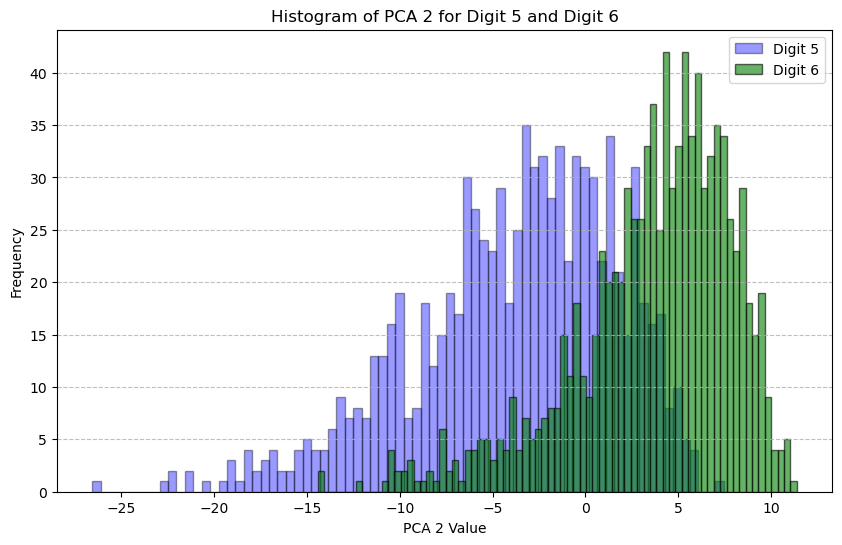

In [15]:
#Plotting distribution of PCA component 1 with frequency for Digit 5 & 6.  -- TESTING
pca1_digit5 = testing_normalized_pca[0:892, 1]
pca1_digit6 = testing_normalized_pca[892:, 1]


hist_digit5, bins_digit5 = np.histogram(pca1_digit5, bins=75)  # Adjust the number of bins as needed
hist_digit6, bins_digit6 = np.histogram(pca1_digit6, bins=75)  # Adjust the number of bins as needed

plt.figure(figsize=(10, 6))
plt.hist(bins_digit5[:-1], bins_digit5, weights=hist_digit5, alpha=0.4, label="Digit 5", color='b', edgecolor='black')
plt.hist(bins_digit6[:-1], bins_digit6, weights=hist_digit6, alpha=0.6, label="Digit 6", color='g', edgecolor='black')


plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.xlabel("PCA 2 Value")
plt.ylabel("Frequency")
plt.title("Histogram of PCA 2 for Digit 5 and Digit 6")
plt.legend()
plt.show()

## Task 4

In [16]:
from scipy.stats import multivariate_normal

train_data_5_pca = training_normalized_pca[:5421]
train_data_6_pca = training_normalized_pca[5421:]

mean_5 = np.mean(train_data_5_pca, axis=0)
covariance_5 = np.cov(train_data_5_pca, rowvar=False)

mean_6 = np.mean(train_data_6_pca, axis=0)
covariance_6 = np.cov(train_data_6_pca, rowvar=False)
print("Mean of Digit 5:",mean_5)
print('------------------------------------------------')
print("Covariance Matrix for Digit 5:\n",covariance_5)
print('------------------------------------------------')
print("Mean of Digit 6:",mean_6)
print('------------------------------------------------')
print("Covariance Matrix for Digit 6:\n",covariance_6)

Mean of Digit 5: [ 4.45320748 -4.06951377]
------------------------------------------------
Covariance Matrix for Digit 5:
 [[23.39792743 15.13683929]
 [15.13683929 36.44222332]]
------------------------------------------------
Mean of Digit 6: [-4.07922233  3.72775171]
------------------------------------------------
Covariance Matrix for Digit 6:
 [[42.26796632 17.9467385 ]
 [17.9467385  18.33394357]]


In [17]:
print("Mean of Digit 6:",mean_6)
print('------------------------------------------------')
print("Covariance Matrix for Digit 6:\n",covariance_6)

Mean of Digit 6: [-4.07922233  3.72775171]
------------------------------------------------
Covariance Matrix for Digit 6:
 [[42.26796632 17.9467385 ]
 [17.9467385  18.33394357]]


## Task 5

In [18]:
predictions = []

class_5_distribution = multivariate_normal(mean=mean_5, cov=covariance_5)
class_6_distribution = multivariate_normal(mean=mean_6, cov=covariance_6)

for data_point in training_normalized_pca:

    pdf_class_5 = class_5_distribution.pdf(data_point)
    pdf_class_6 = class_6_distribution.pdf(data_point)

    if pdf_class_5 > pdf_class_6:
        predictions.append(5)
    else:
        predictions.append(6)


correct_predictions = (np.array(predictions) == train_labels)
accuracy = np.sum(correct_predictions) / len(train_labels)
print(f"Accuracy on the train set: {accuracy * 100:.2f}%")

Accuracy on the train set: 94.28%


# TESTING

In [19]:
from scipy.stats import multivariate_normal
test_data_5_pca = testing_normalized_pca[:892]
test_data_6_pca = testing_normalized_pca[892:]


In [20]:
test_predictions = []

# Create Gaussian distribution objects for both classes
class_5_distribution = multivariate_normal(mean=mean_5, cov=covariance_5)
class_6_distribution = multivariate_normal(mean=mean_6, cov=covariance_6)


for data in testing_normalized_pca:
    pdf_class_5 = class_5_distribution.pdf(data)
    pdf_class_6 = class_6_distribution.pdf(data)

    if pdf_class_5 > pdf_class_6:
        test_predictions.append(5)
    else:
        test_predictions.append(6)

correct_predictions = (np.array(test_predictions) == test_labels)
accuracy = np.sum(correct_predictions) / len(test_labels)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 93.95%
